In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
%%R

# My commonly used R imports
require('tidyverse')

R[write to console]: Loading required package: tidyverse



── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [4]:
%%R

library(jpeg)
library(png)
library(grid)
library(hrbrthemes)

R[write to console]: NOTE: Either Arial Narrow or Roboto Condensed fonts are required to use these themes.

R[write to console]:       Please use hrbrthemes::import_roboto_condensed() to install Roboto Condensed and

R[write to console]:       if Arial Narrow is not on your system, please see https://bit.ly/arialnarrow



In [5]:
# read in a csv file on python

df = pd.read_csv('df_change_new_cleaned.csv')
df

,state,2014,2020,change,perc_change,suicide_2014,suicide_2020
0,Maryland,1,18,17,1700.00,4.6,4.4
1,Connecticut,1,7,6,600.00,3.5,3.1
2,North Carolina,3,20,17,566.67,7.6,8.3
3,Arkansas,2,13,11,550.00,10.9,12.0
4,Minnesota,1,6,5,500.00,5.6,6.3
5,Alabama,2,11,9,450.00,9.9,11.0
6,Colorado,2,11,9,450.00,10.1,11.3
7,Wisconsin,2,10,8,400.00,6.1,7.6
8,Arizona,1,4,3,300.00,10.1,11.2
9,Ohio,7,25,18,257.14,6.4,7.7


In [16]:
# rename column 2020 to shootings_2020

df = df.rename(columns={'2020': 'shootings_2020', '2014': 'shootings_2014'})
df




,state,shootings_2014,shootings_2020,change,perc_change,suicide_2014,suicide_2020
0,Maryland,1,18,17,1700.00,4.6,4.4
1,Connecticut,1,7,6,600.00,3.5,3.1
2,North Carolina,3,20,17,566.67,7.6,8.3
3,Arkansas,2,13,11,550.00,10.9,12.0
4,Minnesota,1,6,5,500.00,5.6,6.3
5,Alabama,2,11,9,450.00,9.9,11.0
6,Colorado,2,11,9,450.00,10.1,11.3
7,Wisconsin,2,10,8,400.00,6.1,7.6
8,Arizona,1,4,3,300.00,10.1,11.2
9,Ohio,7,25,18,257.14,6.4,7.7


In [22]:
# save the dataframe as a csv file

df.to_csv('df_change_new_cleaned.csv', index=False)

In [23]:
df.dtypes  

state              object
shootings_2014      int64
shootings_2020      int64
change              int64
perc_change       float64
suicide_2014      float64
suicide_2020      float64
dtype: object

In [24]:
%%R

# read in a csv file on R

df <- read_csv('df_change_new_cleaned.csv')

Rows: 33 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): state
dbl (6): shootings_2014, shootings_2020, change, perc_change, suicide_2014, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


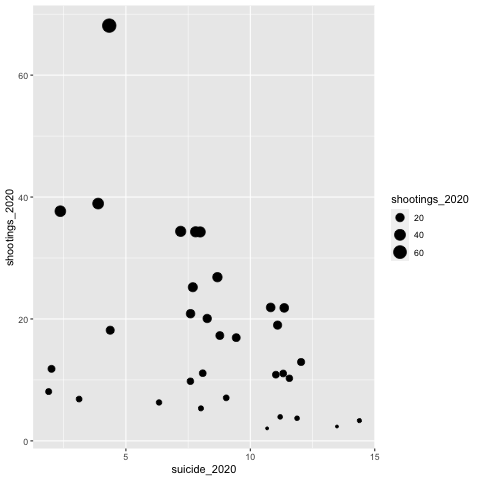

In [29]:
%%R

ggplot(df) +
aes(x = suicide_2020, y = shootings_2020, size = shootings_2020) +
geom_jitter()




In [ ]:
%%R

# create a dot plot that 